# Random processes

So far, we have been loose with our definitions of random signals, correlations, etc. Let's try and make formalize some of those ideas.

In [1]:
import numpy as np
import pylab as pl

## White Noise 

Let's begin with a white noise example. White noise is essentially a sequence of IID normal random numbers. Why is it called white noise?

Text(0.5, 0, 'Sample Number')

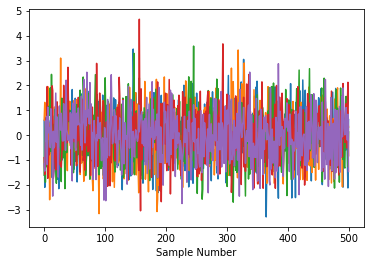

In [2]:
N = 500
for k in range(5):
    x = np.random.randn(N)  # Generate 500 sample white noise
    pl.plot(x)
pl.xlabel('Sample Number')

## "Moving Average" (MA) process

Here, let's start with IID draws, but then pass it out using a moving average filter. What does that do to the signal?

Text(0.5, 0, 'Sample Number')

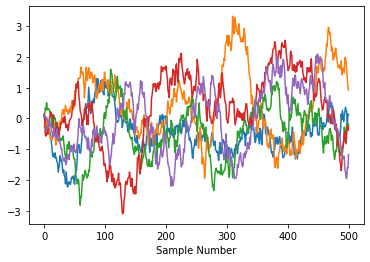

In [3]:
n_ma = 50  ## Do 100 sample moving average
h = np.ones(n_ma) / (n_ma ** 0.5)
from scipy import signal
for k in range(5):
    y = signal.lfilter(h, 1, np.random.randn(N))
    pl.plot(y)
pl.xlabel('Sample Number')

It's clear from above that the white-noise process and the MA process are fundamentally different in some way. How can we characterize this difference?

## Autocorrelation function

Text(0.5, 0, 'Lag (samples)')

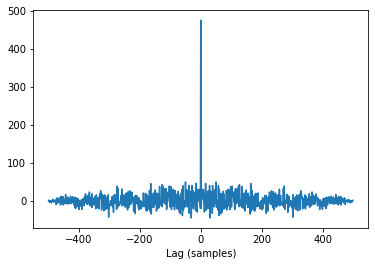

In [4]:
rxx = signal.correlate(x, x, 'full')
lags_x = signal.correlation_lags(x.shape[0], x.shape[0], 'full')
pl.plot(lags_x, rxx)
pl.xlabel('Lag (samples)')

Text(0.5, 0, 'Lag (samples)')

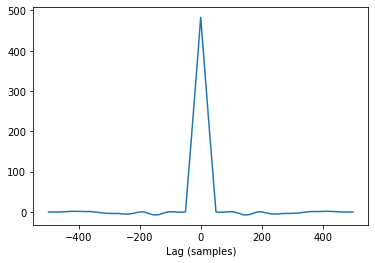

In [5]:
nrep = 1000
ryy_ave = 0
for k in range(nrep):
    y = signal.lfilter(h, 1, np.random.randn(N))
    ryy = signal.correlate(y, y, 'full')
    ryy_ave += ryy
lags_y = signal.correlation_lags(y.shape[0], y.shape[0], 'full')
pl.plot(lags_y, ryy_ave/nrep)
pl.xlabel('Lag (samples)')

## Cross correlation function

Text(0.5, 0, 'Lag (samples)')

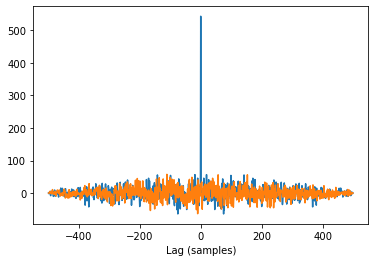

In [6]:
N = 500
nreps = 1
rxx_ave = 0
rxy_ave = 0
for k in range(nreps):
    x = np.random.randn(N)  # Generate 500 sample white noise
    y = np.random.randn(N)
    rxx = signal.correlate(x, x, 'full')
    rxx_ave += rxx
    rxy = signal.correlate(x, y, 'full')
    rxy_ave += rxy

lags = signal.correlation_lags(x.shape[0], y.shape[0], 'full')
pl.plot(lags, rxx_ave/nreps)
pl.plot(lags, rxy_ave/nreps)
pl.xlabel('Lag (samples)')

Text(0.5, 0, 'Lag (samples)')

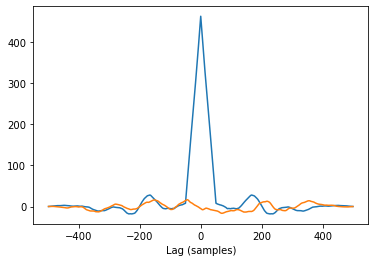

In [7]:
n_ma = 50  ## Do 100 sample moving average
h = np.ones(n_ma) / (n_ma ** 0.5)

nreps = 50
rxx_ave = 0
rxy_ave = 0
for k in range(nreps):
    x = signal.lfilter(h, 1, np.random.randn(N))
    y = signal.lfilter(h, 1, np.random.randn(N))
    rxx = signal.correlate(x, x, 'full')
    rxx_ave += rxx
    rxy = signal.correlate(x, y, 'full')
    rxy_ave += rxy
lags = signal.correlation_lags(x.shape[0], y.shape[0], 'full')
pl.plot(lags, rxx_ave/nreps)
pl.plot(lags, rxy_ave/nreps)
pl.xlabel('Lag (samples)')